# SD212: Graph mining
## Lab 8: Spectral embedding

You will learn how to embed the nodes of a graph in some low-dimensional space using the spectral decomposition of the Laplacian.

You **must** be connected to Telecom ParisTech network!

As this is the last lab, there are only closed questions **(10 points in total)**

## Getting started

In [2]:
from connector import Connector

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
base_url = 'http://137.194.192.23:8234'
lab_id = 'lab8'

## To do

* Enter your login and test it using question #0

In [5]:
# Enter your login (last name followed by first letter of first name)
login = 'zhuf'

In [6]:
connector = Connector(base_url, lab_id, login)
get_question = connector.get_question
post_answer = connector.post_answer
post_text = connector.post_text

In [7]:
get_question(0)

Welcome!


## Import

In [8]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [9]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [10]:
import numpy as np

In [11]:
import scipy.sparse as sp

## 1. Laplacian

Consider an undirected graph of $n$ nodes with adjacency matrix $A$, without self-loops.

The Laplacian is defined by:
$$
L = D - A
$$
where $D = \text{diag}(w)$ is the diagonal matrix of node weights, $w = A1$.

## Toy graph

Consider the following graph:

<IPython.core.display.Javascript object>


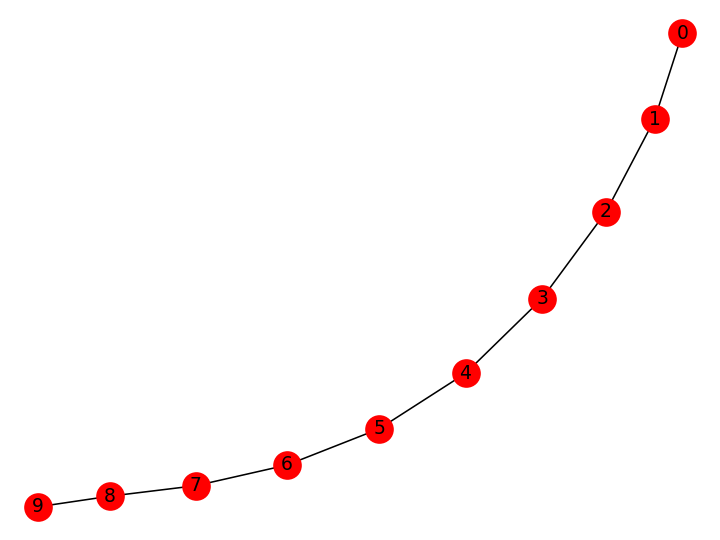

In [12]:
G = nx.path_graph(10)
nx.draw(G, with_labels = True)

In [59]:
def laplacian_matrix(G):
    n = len(G.nodes())
    A = nx.to_scipy_sparse_matrix(G)
    w = sp.csr_matrix.dot(A, np.ones(n))
    D = sp.diags(w)
    L = D - A
    return L

In [60]:
L =  laplacian_matrix(G)
type(L)
print(L.toarray())

[[31. -1. -8. ...  0.  0.  0.]
 [-1.  1.  0. ...  0.  0.  0.]
 [-8.  0. 17. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  5.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0.  7.]]


In [61]:
n = np.shape(L)[0]
n

77

In [62]:
L.dot(np.ones(n))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Heat equation

The Laplacian is related to a diffusion process on the graph governed by the heat equation,
$$
\forall i\not \in S, \quad  \frac{dT_i}{dt} = -(LT)_i,
$$
where $T_i$ be the temperature of node $i$ and $S$ the boundary where temperature is fixed. 

The solution satisfies:
$$
\forall i\not \in S, \quad(LT)_i = 0,
$$
or equivalently,
$$
\forall i\not \in S, \quad T_i = (PT)_i,
$$
where $P = D^{-1}A$ is the transition matrix of the random walk on the graph.

This is the [Dirichlet problem](https://en.wikipedia.org/wiki/Dirichlet_problem).
The most convenient way to compute the solution to the Dirichlet problem is to consider the diffusion induced by the random walk:
$$
\forall i\not \in S, \quad T_i \gets (PT)_i.
$$


## To do

* Complete the ``diffuse`` function below that returns the temperature of each node after $t$ iterations of the above diffusion induced by the random walk, when the temperature of nodes in the ``hot_list`` is set to 1 while the temperature of nodes in the ``cold_list`` is set to 0; the initial temperature of other nodes is 0.5. 
* Answer question #1 **(1 point)**

**Note:** Use the default value $t = 1000$ in your answers to the questions.

In [63]:
def diffuse(G, hot_list = None, cold_list = None, t = 1000):
    n = G.number_of_nodes()
    T = 0.5 * np.ones(n, float)
    # to be completed
    
    A = nx.to_scipy_sparse_matrix(G)
    w = sp.csr_matrix.dot(A, np.ones(n))
    D = sp.diags(w)
    D_inv = sp.linalg.inv(D) 
    P =  sp.csr_matrix.dot(D_inv,A)
    
#     print(D.toarray())
#     print(A.toarray())
    print(sp.csr_matrix.dot(D_inv,A).toarray())
    print(P.to)
    for i in range(t):
        T = sp.csr_matrix.dot(P, T)
    # to be completed
    return T

In [64]:
def diffuse(G, hot_list = None, cold_list = None, t = 1000):
    n = G.number_of_nodes()
    T = 0.5 * np.ones(n, float)
    # to be completed
    A = nx.to_scipy_sparse_matrix(G)
    w = sp.csr_matrix.dot(A, np.ones(n))
    D = sp.diags(w)
    P = sp.diags(1./w).dot(A)
    if hot_list is not None:
        for i in hot_list:
            T[i] = 1
    if cold_list is not None:
        for i in cold_list:
            T[i] = 0
    for i in range(t):
        T = P.dot(T)
        if hot_list is not None: T[hot_list] = 1
        if cold_list is not None: T[cold_list] = 0
    return T

In [65]:
T = diffuse(G)

<IPython.core.display.Javascript object>


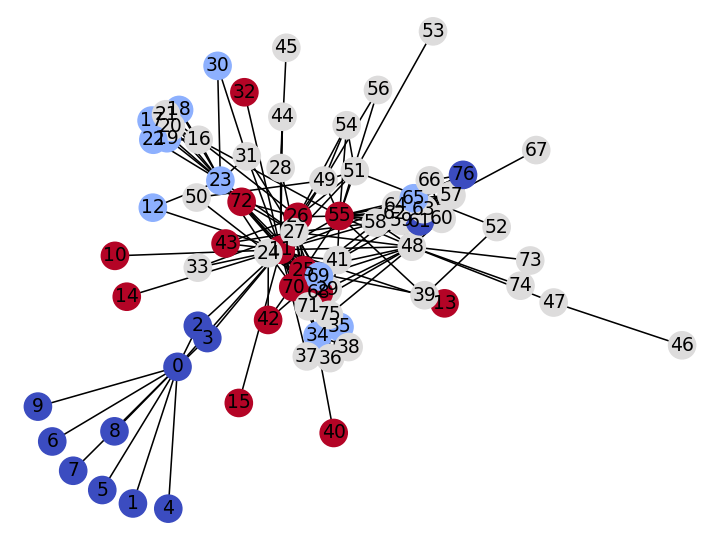

In [66]:
figure()
nx.draw(G, with_labels = True, node_color = T, cmap = 'coolwarm')

In [51]:
get_question(1)

What is the temperature of node 1 after diffusion from node 0 (hot) to node 9 (cold)?
(Enter a float)


In [67]:
answer = 8/9

In [68]:
post_answer(1,answer)

This is correct!


## Real datasets

We now consider the following real datasets, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab6.zip):
* the graph of [Les Misérables](https://fr.wikipedia.org/wiki/Les_Misérables) (co-occurence of characters in chapters of the novel of Victor Hugo)
* the graph of [OpenFlights](https://openflights.org) (number of daily flights between airports)
* the graph of [Wikipedia for Schools](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools) (links between a selection of articles from Wikipedia)

## To do

* Show the heat map of Les Miserables after the diffusion from Marius (hot node) to Cosette and Fantine (cold nodes)
* Answer questions #2, #3 **(1 point each)**

In [69]:
G = nx.read_graphml("miserables.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')
pos = nx.spring_layout(G)

In [70]:
T = diffuse(G)

<IPython.core.display.Javascript object>


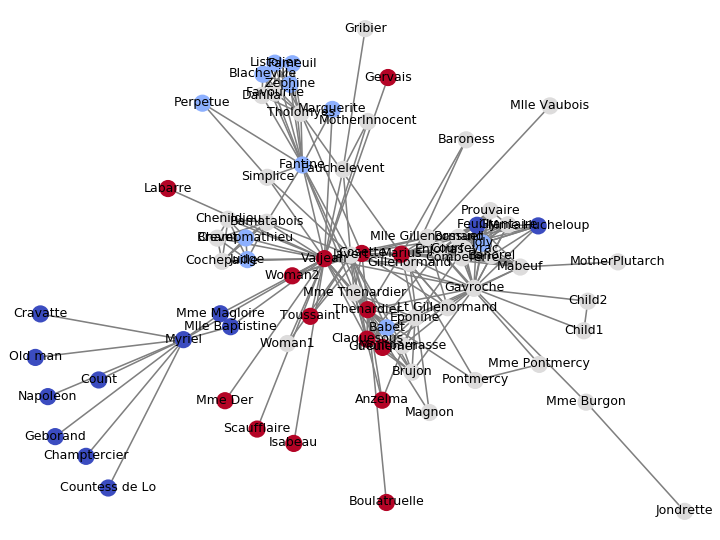

In [71]:
figure() 
nx.draw(G, pos, labels = names, font_size = 8, node_size = 100, edge_color = 'gray', node_color = T, cmap = 'coolwarm')

In [33]:
G.nodes(True)

NodeDataView({0: {'name': 'Myriel'}, 1: {'name': 'Napoleon'}, 2: {'name': 'Mlle Baptistine'}, 3: {'name': 'Mme Magloire'}, 4: {'name': 'Countess de Lo'}, 5: {'name': 'Geborand'}, 6: {'name': 'Champtercier'}, 7: {'name': 'Cravatte'}, 8: {'name': 'Count'}, 9: {'name': 'Old man'}, 10: {'name': 'Labarre'}, 11: {'name': 'Valjean'}, 12: {'name': 'Marguerite'}, 13: {'name': 'Mme Der'}, 14: {'name': 'Isabeau'}, 15: {'name': 'Gervais'}, 16: {'name': 'Tholomyes'}, 17: {'name': 'Listolier'}, 18: {'name': 'Fameuil'}, 19: {'name': 'Blacheville'}, 20: {'name': 'Favourite'}, 21: {'name': 'Dahlia'}, 22: {'name': 'Zephine'}, 23: {'name': 'Fantine'}, 24: {'name': 'Mme Thenardier'}, 25: {'name': 'Thenardier'}, 26: {'name': 'Cosette'}, 27: {'name': 'Javert'}, 28: {'name': 'Fauchelevent'}, 29: {'name': 'Bamatabois'}, 30: {'name': 'Perpetue'}, 31: {'name': 'Simplice'}, 32: {'name': 'Scaufflaire'}, 33: {'name': 'Woman1'}, 34: {'name': 'Judge'}, 35: {'name': 'Champmathieu'}, 36: {'name': 'Brevet'}, 37: {'name

In [72]:
get_question(2)

What is the hotest character of Les Miserables after the diffusion from Marius to Cosette and Fantine?
(Enter a string; Marius is excluded)


In [73]:
answer = "Baroness"

In [74]:
post_answer(2,answer)

This is correct!


In [75]:
G = nx.read_graphml("wikipedia-schools-undirected.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

In [76]:
get_question(3)

What is the hotest article of Wikipedia for Schools after the diffusion from Dog to Cat?
(Enter a string; Dog is excluded)


In [77]:
answer = "Boston Terrier"

In [78]:
post_answer(3,answer)

This is correct!


## 2. Spectral embedding

The spectral embedding of the graph relies on the spectral decomposition of the Laplacian, after proper normalization and shift.

In [79]:
def spectral_embedding(G, k = 10):
    # Laplacian matrix
    n = len(G.nodes())
    L = laplacian_matrix(G)
    w =  sum(L.diagonal())
    # Spectral decomposition
    e_values, e_vectors = sp.linalg.eigsh(L, min(k,n - 1), sigma = -1)
    # Normalization
    Z = (e_vectors[:,1:] / np.sqrt(e_values[1:])).T
    # Shift
    pi_vect = w / np.sum(w)
    X = np.sqrt(np.sum(w)) * np.dot(Z, np.eye(n) - np.outer(pi_vect,np.ones(n)))
    return X

In [80]:
def show_embedding(X, label = False, index = None, a = 0, b = 1):
    # Show the projection of the embedding on components a, b
    # Only nodes listed in the index are displayed
    if index == None:
        n = shape(X)[1]
        index = range(n)
    figure(figsize = (5,5))
    scatter(X[a,index],X[b,index])
    if label:
        for u in index:
            annotate(G.node[u]['name'], (X[a,u],X[b,u]))
    show()

## To do

* Visualize the spectral embedding of Les Miserables and of some categories of pages of Wikipedia for Schools (see below)
* Answer questions #4, #5, #6, #7 **(1 point each)**

**Note:** Use $k = 10$ and $k = 100$ for the respective dimensions of the embeddings of the graphs Les Miserables and Wikipedia for Schools

In [94]:
G = nx.read_graphml("miserables.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')
pos = nx.spring_layout(G)

In [95]:
X = spectral_embedding(G)

<IPython.core.display.Javascript object>


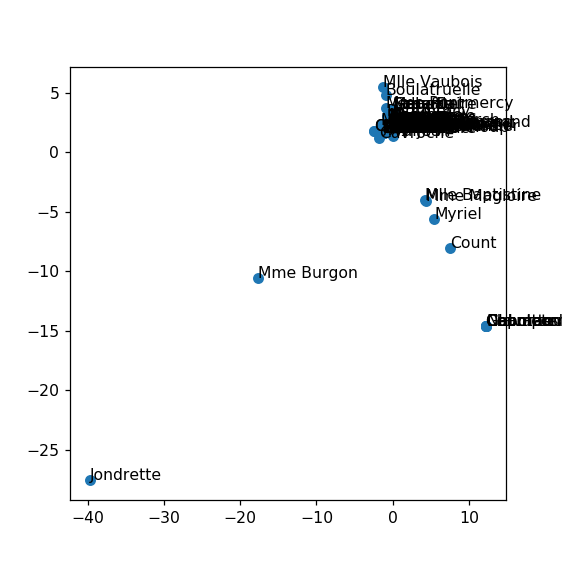

In [96]:
show_embedding(X, label = True)

In [100]:
G = nx.read_graphml("wikipedia-schools-undirected.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')
categories = nx.get_node_attributes(G, 'category')

In [101]:
X = spectral_embedding(G, k = 100)

In [102]:
for c in sorted(set(categories.values())):
    print(c)

Art.Art
Art.Artists
Business Studies.Business
Business Studies.Companies
Business Studies.Currency
Business Studies.Economics
Citizenship.Animal and Human Rights
Citizenship.Community organisations
Citizenship.Conflict and Peace
Citizenship.Culture and Diversity
Citizenship.Education
Citizenship.Environment
Citizenship.Law
Citizenship.Media
Citizenship.Politics and government
Countries
Design and Technology.Air and Sea transport
Design and Technology.Architecture
Design and Technology.Engineering
Design and Technology.Railway transport
Design and Technology.Road transport
Everyday life.Cartoons
Everyday life.Computer and Video games
Everyday life.Drink
Everyday life.Everyday life
Everyday life.Films
Everyday life.Food and agriculture
Everyday life.Games
Everyday life.Recreation
Everyday life.Sports
Everyday life.Sports events
Everyday life.Sports teams
Everyday life.Television
Geography.African Geography
Geography.African Geography.African Countries
Geography.Antarctica
Geography.Centr

In [105]:
def top_nodes_category(category):
    nodelist = [u for u in G.nodes() if 'category' in G.node[u] and G.node[u]['category'] == category]
    return sorted(nodelist, reverse = True, key = G.degree)

In [106]:
countries = top_nodes_category('Countries')
mammals = top_nodes_category('Science.Biology.Mammals')
artists = top_nodes_category('People.Artists')

<IPython.core.display.Javascript object>


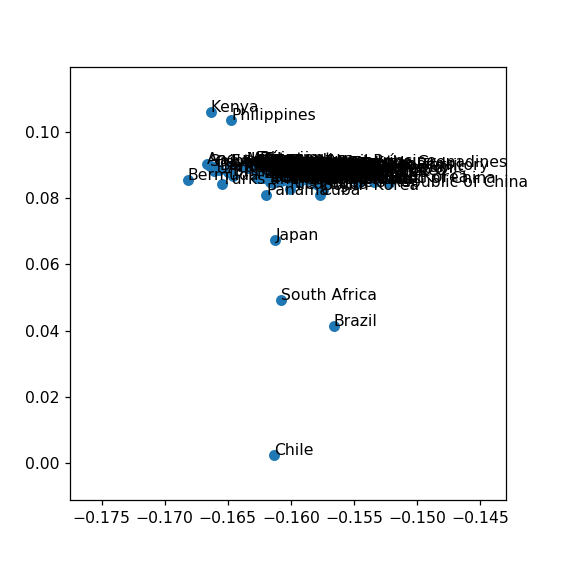

In [107]:
show_embedding(X, label = True, index = countries)

In [116]:
get_question(4)

Which character of Les Miserables is the closest from Marius in the spectral embedding of the graph?
(Enter a string; Marius is excluded)


In [117]:
answer = "Cosette"

In [118]:
post_answer(4,answer)

This is correct!


In [119]:
get_question(5)

Which character of Les Miserables is the closest from Marius in terms of mean hitting time by a random walk?
(Enter a string; Marius is excluded)


In [120]:
answer = "Valjean"

In [121]:
post_answer(5,answer)

This is correct!


In [122]:
get_question(6)

Which article of Wikipedia for Schools is the closest from Albert Einstein in the spectral embedding of the graph?
(Enter a string; Albert Einstein is excluded)


In [123]:
answer = ""

In [131]:
post_answer(6,"Isaac Newton")

This is correct!


In [125]:
get_question(7)

Which article of Wikipedia for Schools is the closest from Albert Einstein in terms of mean hitting time by a random walk?
(Enter a string; Albert Einstein is excluded)


In [132]:
answer = "Science"

In [134]:
post_answer(7,answer)

This is correct!


## 3. Hierarchical clustering

Finally, we use the spectral embedding of the graph to get a hierarchical clustering based on the [Ward method](https://en.wikipedia.org/wiki/Ward%27s_method).

The output is a called a [dendrogram](https://en.wikipedia.org/wiki/Dendrogram).

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
G = nx.random_partition_graph([10,15,20], 0.5, 0.02)

In [ ]:
X = spectral_embedding(G)

In [ ]:
D = sch.linkage(X.T,method =  'ward')

In [ ]:
figure()
sch.dendrogram(D)
show()

## To do

* Answer question #8 **(3 points)**

In [126]:
get_question(8)

How many nodes are there in the subtree containing the airports of Dubai and Nairobi in the dendrogram of the graph Openflights?
(Enter an integer; you need to first understand the data structure used for the dendrogram)


In [130]:
G = nx.read_graphml("openflights.graphml", node_type = int)
names = nx.get_node_attributes(G, 'name')

In [135]:
post_answer(8,234)

This is correct!
